# PROBLEM SET 3 

# Question 1

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and
materials.
Occupations

Step 1. Import the necessary libraries


In [1]:
import numpy as np

In [2]:
import pandas as pd

Step 2. Import the dataset from this address.

In [20]:
dataset1 = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep = '|')

In [21]:
dataset1

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Step 3. Assign it to a variable called users

In [23]:
users = dataset1
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Step 4. Discover what is the mean age per occupation

In [6]:
users.groupby('occupation').age.agg(['mean'])

,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [8]:
users['ratio'] = users.gender.apply(lambda x: True if x == 'M' else False)

In [9]:
users.ratio

0       True
1      False
2       True
3       True
4      False
       ...  
938    False
939     True
940     True
941    False
942     True
Name: ratio, Length: 943, dtype: bool

In [10]:
(users.groupby('occupation').ratio.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [11]:
minmax = users.groupby('occupation').agg({'age': ['min','max']})

In [12]:
minmax

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

Step 7. For each combination of occupation and sex, calculate the mean age

In [13]:
meanage = users.groupby(['occupation','gender']).agg({'age': ['mean']})

In [14]:
meanage

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

Step 8. For each occupation present the percentage of women and men

In [17]:
gendercount = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
occcount = users.groupby(['occupation']).agg('count')
percent = gendercount.div(occcount, level = "occupation") * 100
percent.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2
Euro Teams
Step 1. Import the necessary libraries

In [18]:
import numpy as np

In [19]:
import pandas as pd

Step 2. Import the dataset from this address

In [24]:
dataset2 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")

In [25]:
dataset2

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 3. Assign it to a variable called euro12

In [26]:
euro12 = dataset2

In [27]:
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


Step 4. Select only the Goal column

In [28]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [29]:
num = euro12['Team'].count()
print("No. of teams which participated in the Euro2012 are:", num)

No. of teams which participated in the Euro2012 are: 16


Step 6. What is the number of columns in the dataset?

In [30]:
columnnum = len(euro12.axes[1])
print("The number of columns in the dataset are: ", columnnum)

The number of columns in the dataset are:  35


Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [31]:
discipline  = pd.DataFrame(euro12, columns = ['Team', 'Yellow Cards', 'Red Cards'])
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [32]:
discipline.sort_values(by = ['Red Cards','Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [33]:
meanyellow = discipline.groupby('Team').agg({'Yellow Cards': ['mean']})
meanyellow

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


Step 10. Filter teams that scored more than 6 goals

In [34]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [35]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [36]:
euro12.iloc[:, list(range(7))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [37]:
euro12.iloc[:,:-3 ]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [38]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
Housing
Step 1. Import the necessary libraries

In [39]:
import random

In [40]:
import numpy as np

In [41]:
import pandas as pd

Step 2. Create 3 differents Series, each of length 100, as follows:

a) The first a random number from 1 to 4

In [42]:
firseries = [[random.randint(1, 4)] for i in range(100)]
series1 = pd.DataFrame(firseries)
series1

,0
0,3
1,2
2,4
3,3
4,4
...,...
95,3
96,4
97,1
98,1


b) The second a random number from 1 to 3

In [43]:
secseries = [[random.randint(1, 3)] for i in range(100)]
series2 = pd.DataFrame(secseries)
series2

,0
0,2
1,3
2,2
3,2
4,1
...,...
95,3
96,2
97,1
98,2


c) The third a random number from 10,000 to 30,000

In [44]:
thirdseries = [[random.randint(10000, 30000)] for i in range(100)]
series3 = pd.DataFrame(thirdseries)
series3

,0
0,13961
1,26078
2,12571
3,10739
4,29286
...,...
95,15749
96,27441
97,24351
98,24433


Step 3. Create a DataFrame by joinning the Series by column

In [46]:
dataframe = pd.concat([series1, series2, series3], axis=1)
dataframe.columns = ['Series #1', 'Series #2', 'Series #3']
dataframe

,Series #1,Series #2,Series #3
0,3,2,13961
1,2,3,26078
2,4,2,12571
3,3,2,10739
4,4,1,29286
...,...,...,...
95,3,3,15749
96,4,2,27441
97,1,1,24351
98,1,2,24433


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [47]:
dataframe.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
dataframe

,bedrs,bathrs,price_sqr_meter
0,3,2,13961
1,2,3,26078
2,4,2,12571
3,3,2,10739
4,4,1,29286
...,...,...,...
95,3,3,15749
96,4,2,27441
97,1,1,24351
98,1,2,24433


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [53]:
bigcolumn = pd.concat([series1,series2,series3])
bigcolumn.columns = ['bigcolumn']
bigcolumn

,bigcolumn
0,3
1,2
2,4
3,3
4,4
...,...
95,15749
96,27441
97,24351
98,24433


Step 6. Ops it seems it is going only until index 99. Is it true?

Yes, the result is just displaying rows until index 99. 

Step 7. Reindex the DataFrame so it goes from 0 to 299

In [54]:
bigcolumn.reset_index()

,index,bigcolumn
0,0,3
1,1,2
2,2,4
3,3,3
4,4,4
...,...,...
295,95,15749
296,96,27441
297,97,24351
298,98,24433


# Question 4

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:

Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

Step 1. Import the necessary libraries

In [131]:
import pandas as pd
import numpy as np

Step 2. Import the dataset from the attached file wind.txt

In [132]:
dataset2 = pd.read_csv('wind.txt',sep = '\s+')

In [133]:
dataset2

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [134]:
data = dataset2

In [135]:
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [136]:
data["Datetime"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis = 1))
data = data.drop(columns = ["Yr","Mo","Dy"])

In [137]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Datetime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [138]:
data["str"] = data["Datetime"].astype(str).str.slice(0,4)
data["str"] = data["str"].astype(int)
data["str"] = data["str"].apply(lambda x: x-100 if x > 2022 else x)

In [139]:
data["DateTime"] = data["str"].astype(str) + data["Datetime"].astype(str).str.slice(4,10) 

In [140]:
data.drop (["Datetime","str"],axis = 1,inplace = True)

In [141]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,DateTime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [142]:
data["DateTime"].astype("datetime64[ns]")

0      1961-01-01
1      1961-01-02
2      1961-01-03
3      1961-01-04
4      1961-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: DateTime, Length: 6574, dtype: datetime64[ns]

In [143]:
data.set_index("DateTime",inplace=True)

Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [144]:
data.isnull().sum().sum()

31

Step 7. Compute how many non-missing values there are in total.

In [145]:
data.notnull().sum().sum()

78857

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.

In [148]:
data.mean().mean()

10.227982360836924

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days

In [153]:
minimum = pd.Series(data.min(), name = 'min')
maximum = pd.Series(data.max(), name = 'max')
average = pd.Series(data.mean(), name = 'mean')
sd = pd.Series(data.std(), name = 'sd')

In [154]:
combined = pd.concat([minimum,maximum,average,sd],axis = 1).transpose()

In [155]:
loc_stats = pd.DataFrame(combined)

In [156]:
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
sd,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

In [157]:
minimum = pd.Series(data.min(axis = 1), name = 'min')
maximum = pd.Series(data.max(axis = 1), name = 'max')
average = pd.Series(data.mean(axis = 1), name = 'mean')
sd = pd.Series(data.std(axis = 1), name ='sd')

In [158]:
combined = pd.merge(minimum,maximum,left_index = True,right_index = True)
combined1 = pd.merge(average,sd,left_index = True,right_index = True)
day_stats = combined.join(combined1)
day_stats

,min,max,mean,sd
DateTime,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


Step 11. Find the average windspeed in January for each location.

In [159]:
datetime = data.reset_index()
datetime["DateTime"] = datetime["DateTime"].apply(pd.to_datetime)

In [160]:
datetime.set_index("DateTime",inplace = True)

In [161]:
average_jan = datetime[datetime.index.month == 1]
average_jan.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [162]:
print(datetime.resample('Y').mean())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

Step 13. Downsample the record to a monthly frequency for each location.

In [163]:
print(datetime.resample('M').mean())

                  RPT        VAL        ROS       KIL        SHA        BIR  \
DateTime                                                                      
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

Step 14. Downsample the record to a weekly frequency for each location.

In [164]:
print(datetime.resample('W').mean())

                  RPT        VAL        ROS        KIL        SHA        BIR  \
DateTime                                                                       
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week

In [165]:
weeklystats = datetime[datetime.index.year == 1961]
weeklystats1 = datetime.resample('W').mean().apply(lambda x: x.describe())

In [166]:
weeklystats1

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,940.000000,940.000000,940.000000,940.000000,939.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,12.365304,10.647725,11.661255,6.309334,10.455607,7.094787,9.801271,8.496123,8.496452,8.710639,13.125912,15.597171
std,3.466600,3.372501,2.840361,2.186432,3.146715,2.556633,3.308180,2.853029,2.638349,2.924546,3.757189,4.468526
min,3.874286,2.452857,4.901429,1.447143,2.775714,1.382857,2.471429,2.284286,2.262857,1.571429,3.661429,5.124286
25%,9.884286,8.277857,9.613929,4.742857,8.248571,5.211071,7.432500,6.470000,6.589286,6.530000,10.346429,12.269286
50%,12.291429,10.486429,11.490000,6.165714,10.254286,6.933571,9.603571,8.358571,8.394286,8.490000,12.846429,15.330714
75%,14.547143,12.757857,13.457143,7.584286,12.627143,8.842500,11.942143,10.457500,10.108571,10.699643,15.513571,18.683929
max,24.010000,23.715714,21.384286,14.517143,22.897143,16.010000,20.474286,17.861429,17.460000,17.932857,26.617143,30.374286


# Question 5

Step 1. Import the necessary libraries

In [146]:
import numpy as np

In [147]:
import pandas as pd

Step 2. Import the dataset from this address.

In [73]:
dataset5 = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", sep = '\t')

In [74]:
dataset5

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Step 3. Assign it to a variable called chipo.

In [75]:
chipo = dataset5
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Step 4. See the first 10 entries

In [76]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [77]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


Step 6. What is the number of columns in the dataset?

In [78]:
len(chipo.columns)

5

Step 7. Print the name of all the columns.

In [79]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [80]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [81]:
chipo.groupby(by = "item_name").sum().sort_values('quantity',ascending = False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


Step 10. For the most-ordered item, how many items were ordered?

In [82]:
moitem = chipo.groupby(by = "item_name").sum().sort_values('quantity',ascending = False)
moitem.head(1).quantity

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

Step 11. What was the most ordered item in the choice_description column?

In [83]:
chipo.groupby(by = "choice_description").sum().sort_values('quantity',ascending = False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


Step 12. How many items were orderd in total?

In [84]:
chipo.item_name.count()

4622

Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [85]:
chipo['item_price'].dtypes

dtype('O')

In [86]:
def convertfloat(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(convertfloat)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [87]:
chipo['item_price'].dtypes

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [88]:
calc =  (chipo.item_price * chipo.quantity).sum()
print('The revenue for the period in the dataset is : $ ', calc)

The revenue for the period in the dataset is : $  39237.02


Step 15. How many orders were made in the period?

In [89]:
chipo.order_id.value_counts().count()

1834

Step 16. What is the average revenue amount per order?

In [90]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
count = chipo.groupby(by = ['order_id']).sum()
count.mean()['revenue']

21.394231188658654

Step 17. How many different items are sold?

In [91]:
chipo.item_name.value_counts().count()

50

# Question 6

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
dataset6 = pd.read_csv("C:\\Users\\Akash\\Downloads\\BDAT\\Sem 1\\Data Programming\\Problem Set 3\\us-marriages-divorces-1867-2014.csv")
dataset6

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


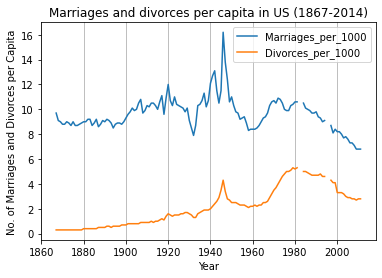

In [95]:
dataset6.plot(x = 'Year', y = ['Marriages_per_1000', 'Divorces_per_1000'])
plt.title('Marriages and divorces per capita in US (1867-2014)')
plt.ylabel('No. of Marriages and Divorces per Capita')
plt.xlabel('Year')
plt.grid(axis = 'x')
plt.show()

# Question 7

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [96]:
import matplotlib.pyplot as plt

In [98]:
import pandas as pd

In [99]:
dataset7 = pd.read_csv("C:\\Users\\Akash\\Downloads\\BDAT\\Sem 1\\Data Programming\\Problem Set 3\\us-marriages-divorces-1867-2014.csv")
dataset7

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


In [100]:
chart_data = dataset7[(dataset7.Year == 1900) | (dataset7.Year == 1950) |(dataset7.Year == 2000)]
chart_data

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


(array([0, 1, 2]),
 [Text(0, 0, '1900'), Text(1, 0, '1950'), Text(2, 0, '2000')])

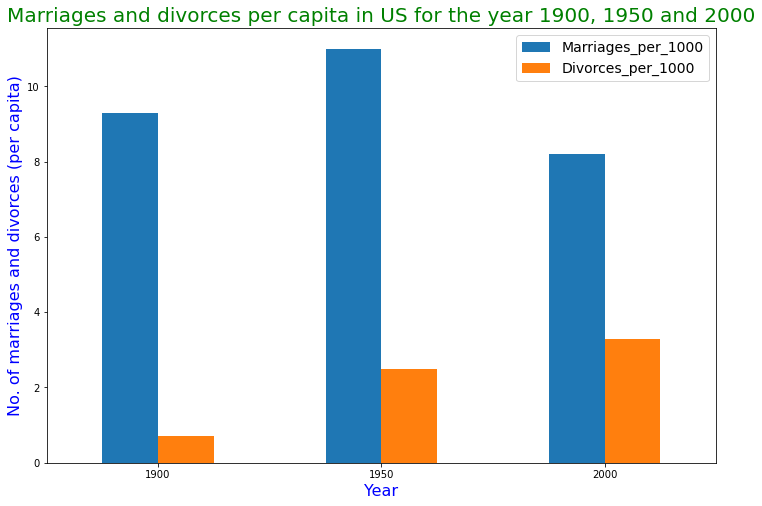

In [111]:
chart_data.set_index('Year')[['Marriages_per_1000', 'Divorces_per_1000']].plot(kind = 'bar', figsize=(12, 8))

plt.title("Marriages and divorces per capita in US for the year 1900, 1950 and 2000", fontsize = 20, color = 'Green')
plt.xlabel("Year", fontsize = 16, color = 'Blue'  )
plt.ylabel("No. of marriages and divorces (per capita)", fontsize = 16, color = 'Blue')
plt.legend(["Marriages_per_1000", "Divorces_per_1000"], fontsize = 14)
plt.xticks(rotation = 360)

# Question 8

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [104]:
import matplotlib.pyplot as plt

In [105]:
import pandas as pd

In [106]:
dataset8 = pd.read_csv("C:\\Users\\Akash\\Downloads\\BDAT\\Sem 1\\Data Programming\\Problem Set 3\\actor_kill_counts.csv")

In [107]:
dataset8

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


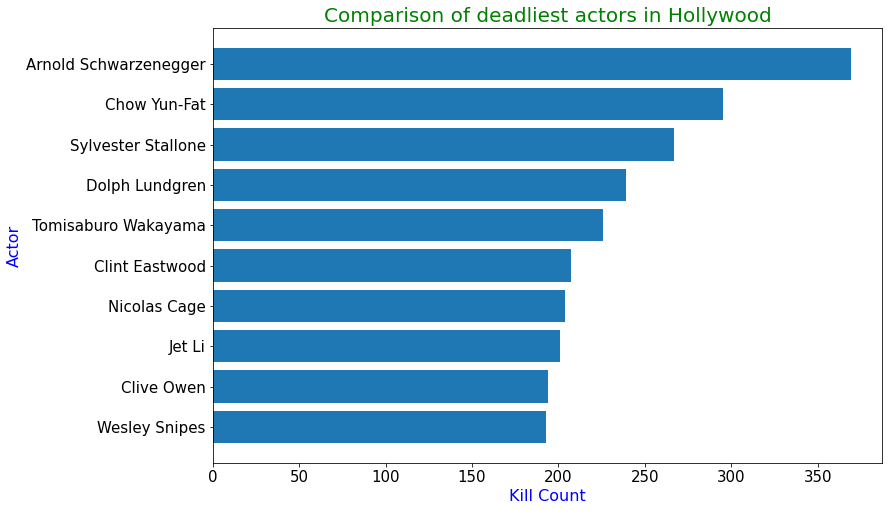

In [114]:
plt.figure(figsize = (12,8))
plt.barh(dataset8.Actor,dataset8.Count,align = 'center')
dataset8 = dataset8.sort_values('Count',ascending = True)

plt.title('Comparison of deadliest actors in Hollywood',fontsize = 20, color = 'Green')
plt.xlabel('Kill Count',fontsize = 16, color = 'Blue')
plt.ylabel('Actor',fontsize = 16, color = 'Blue')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

# Question 9

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [112]:
import pandas as pd

In [113]:
import matplotlib.pyplot as plt

In [115]:
dataset9 = pd.read_csv("C:\\Users\\Akash\\Downloads\\BDAT\\Sem 1\\Data Programming\\Problem Set 3\\roman-emperor-reigns.csv")

In [116]:
dataset9

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
...,...,...,...
63,Valentinian I,11.00,Natural causes
64,Valens,14.00,Killed in battle
65,Gratian,16.00,Assassinated
66,Valentinian II,17.00,Possibly assassinated


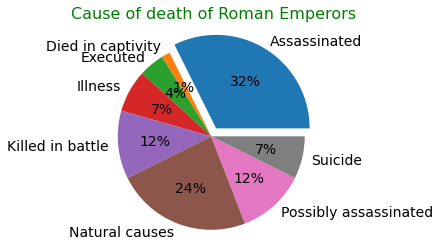

In [124]:
causedata = pd.DataFrame({'count' : dataset9.groupby("Cause_of_Death" ).size()}).reset_index() 
labels = causedata['Cause_of_Death'].values
sizes = causedata['count'].values
x = 0.0
y = 0.1
explode = [y if item == 'Assassinated' else x for item in labels ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct ='%1.0f%%', startangle = 0, textprops = {'fontsize':14})
ax1.axis('equal')
plt.title('Cause of death of Roman Emperors', fontsize = 16, color = 'Green')
plt.show()

# Question 10

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [125]:
import pandas as pd

In [126]:
import matplotlib.pyplot as plt

In [127]:
import seaborn as sns

In [128]:
dataset10 = pd.read_csv("C:\\Users\\Akash\\Downloads\\BDAT\\Sem 1\\Data Programming\\Problem Set 3\\arcade-revenue-vs-cs-doctorates.csv")

In [129]:
dataset10

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

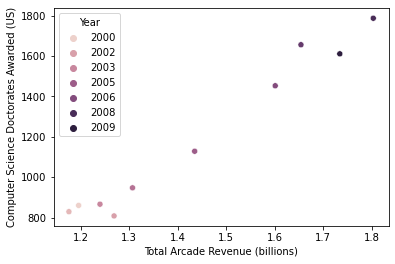

In [130]:
sns.scatterplot(x = 'Total Arcade Revenue (billions)', y = 'Computer Science Doctorates Awarded (US)', hue = 'Year', data = dataset10)